# Ray tracing with Cython

This is the example usage of the `raytracing` module.

## The setup

### Enviroment

This example was run on Mac OS X in the conda enviroment created with the command:

`conda create --name mycythonenv jupyter cython matplotlib`

### Building the cython module

As Cython needs to be compiled, we need to build the module first.

In [1]:
! python setup.py build_ext --inplace

Compiling raytracing.pyx because it changed.
[1/1] Cythonizing raytracing.pyx
running build_ext
building 'raytracing' extension
/usr/local/bin/gcc-9 -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -I/Users/kolodzey/miniconda3/envs/cython-2/include -I/Users/kolodzey/miniconda3/envs/cython-2/include -I/Users/kolodzey/miniconda3/envs/cython-2/include/python3.7m -c raytracing.cpp -o build/temp.macosx-10.7-x86_64-3.7/raytracing.o -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -I/Users/kolodzey/miniconda3/envs/cython-2/include -arch x86_64 -I/Users/kolodzey/miniconda3/envs/cython-2/include -arch x86_64 --std=c++17
cc1plus: warning: command line option '-Wstrict-prototypes' is valid for C/ObjC but not for C++
/usr/local/bin/g++-9 -bundle -undefined dynamic_lookup -L/Users/kolodzey/miniconda3/envs/cython-2/lib -arch x86_64 -L/Users/kolodzey/miniconda3/envs/cython-2/lib -arch x86_64 -a

### Importing the cython module

We can import the compiled module as usual. Let's render an image and display it with `matplotlib`

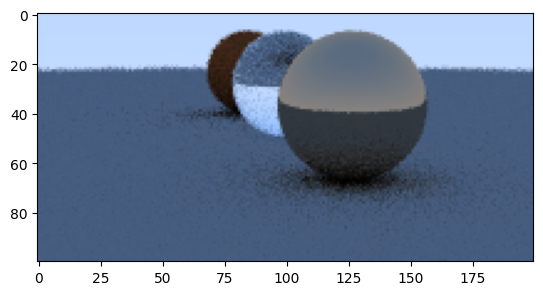

In [2]:
import matplotlib.pyplot as plt
import raytracing

%matplotlib inline

camera = {
    "lookfrom": (13, 2, 3),
    "lookat": (0, 0, 0),
    "vup": (0, 1, 0),
    "vfov": 20,
    "aspect": 2,
    "aperture": 0.1,
    "focus_distance": 10
}

world = []

#floor
world.append(
    {
        "type": "sphere",
        "center": (0, -1000, 0),
        "radius": 1000,
        "material": {
            "type": "lambertian",
            "albedo": (0.5, 0.5, 0.5)
        }
    }
)

# three big spheres
world.extend([
    {
        "type": "sphere",
        "center": (0, 1, 0),
        "radius": 1.0,
        "material": {
            "type": "dielectric",
            "ref_idx": 1.5
        }
    },
    {
        "type": "sphere",
        "center": (-4, 1, 0),
        "radius": 1.0,
        "material": {
            "type": "lambertian",
            "albedo": (0.4, 0.2, 0.1)
        }
    },
    {
        "type": "sphere",
        "center": (4, 1, 0),
        "radius": 1.0,
        "material": {
            "type": "metal",
            "albedo": (0.7, 0.6, 0.5),
            "fuzz": 0
        }
    }
])

image = raytracing.render(world, camera, h=100, w=200)
plt.imshow(image)